In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import yaml

from gammapy.datasets import MapDataset, Datasets, FluxPointsDataset
from gammapy.maps import Map
from gammapy.makers import FoVBackgroundMaker
from gammapy.catalog import SourceCatalogHGPS
from gammapy.modeling.models import SkyModel, TemplateSpatialModel, PowerLawNormSpectralModel

In [2]:
def open_dataset(name, hessera):
    dataset= MapDataset.read(f'{mainpath_hess}/{name}.fits')
    dataset.mask_safe = Map.from_geom(geom=dataset.counts.geom, data=np.ones_like(dataset.counts.data).astype(bool))   
    dataset.mask_safe &= dataset.counts.geom.region_mask(f"galactic;circle(0, 0, 3)")
    
    dataset.mask_fit = Map.from_geom(geom=dataset.counts.geom, data=np.ones_like(dataset.counts.data).astype(bool))   
    dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(358.71, -0.64, 0.7)")

    if hessera == 'hess1':
        dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(359.5, -0.2, 0.2)")
        dataset.mask_fit &= ~dataset.counts.geom.region_mask(f"galactic;circle(358.45, 0.15, 0.35)")

    return dataset

In [3]:
hesseras=['hess1', 'hess2', 'hess1u']
muoneff_flag= True
edisp = True

info_list = [] #hessera, muoneff, edisp, name

mainpath_hess = '/home/vault/caph/mppi062h/repositories/GC/HESS'

for hessera in hesseras:
    if hessera =='hess1u':
        muoneff_flag=False
        
    if hessera == 'hess1':
        name_afterFermi='v1'
        for name_afterFermi_idx in range(3):
            name = f'20220702_{hessera}_muoneff{muoneff_flag}_edisp{edisp}_afterFermi{name_afterFermi}_{name_afterFermi_idx}'
            info_list.append([hessera, muoneff_flag, edisp, name])
    else:
        name = f'20220702_{hessera}_muoneff{muoneff_flag}_edisp{edisp}'
        info_list.append([hessera, muoneff_flag, edisp, name])
    
datasets_hess = []
for i in range(len(info_list)):
    datasets_hess.append(open_dataset(info_list[i][3], info_list[i][0])) 

In [4]:
catalog = SourceCatalogHGPS()

## if you are doing the fit

In [5]:
mask1 = np.abs(catalog.table['GLAT']) < 2.6
mask2 = (catalog.table['GLON'] < 2.6) + (catalog.table['GLON'] > 357.4)
mask = mask1 & mask2
HGPS_models = catalog[mask].to_models()

filename='/home/saturn/caph/mppi043h/diffusiontemplate/cont_pcut_v3.fits'
diff_map = Map.read(filename)
diff= SkyModel(spectral_model=PowerLawNormSpectralModel(),
               spatial_model=TemplateSpatialModel(diff_map, normalize=False, filename=filename),
               name='diff-emission')
diff.parameters['tilt'].frozen=False

initial_model_hess = HGPS_models
initial_model_hess.append(diff)

In [6]:
frozen_sources= ['HESS J1745-303', 'HESS J1746-308', 'HESS J1741-302', 'HESS J1746-285', 'HESS J1747-281']

for s in initial_model_hess:
    if s.name in frozen_sources:
        s.parameters.freeze_all()
        
frozen_pos_sources= ['HESS J1745-290']
for s in initial_model_hess:
    if s.name in frozen_pos_sources:
        s.spatial_model.parameters.freeze_all()

In [7]:
print(initial_model_hess)

Models

Component 0: SkyModel

  Name                      : HESS J1741-302
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index        (frozen)   :      2.300                   
    amplitude    (frozen)   :   2.10e-13       1 / (cm2 s TeV)
    reference    (frozen)   :      1.000       TeV         
    lon_0        (frozen)   :    358.277       deg         
    lat_0        (frozen)   :      0.049       deg         

Component 1: SkyModel

  Name                      : HESS J1745-290
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                   :      2.140   +/-    0.02             
    amplitude               :   2.55e-12   +/- 4.0e-14 1 / (cm2 s TeV)
    reference    (frozen)   :      1.000    

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 826
	total stat : 775085.95

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 826
	total stat : 775085.95




/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in subtract
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 968
	total stat : 549745.88

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 968
	total stat : 549745.88


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 594
	total stat : 508344.00

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 594
	total stat : 508344.00


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 661
	total stat : 505482.67

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev    

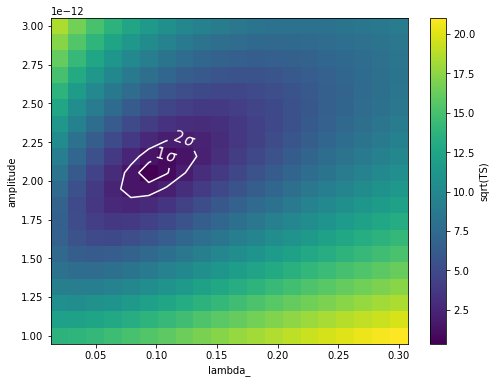

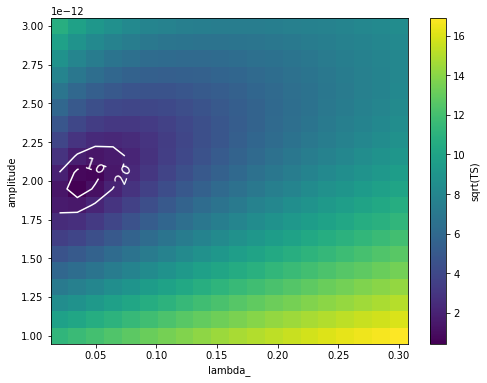

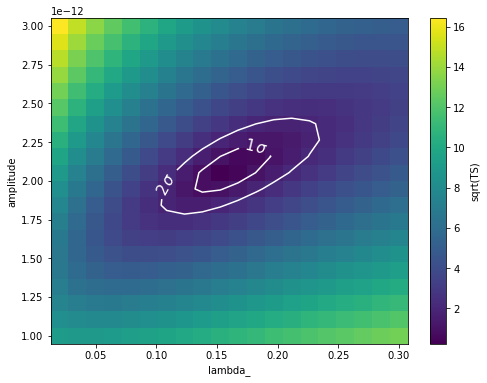

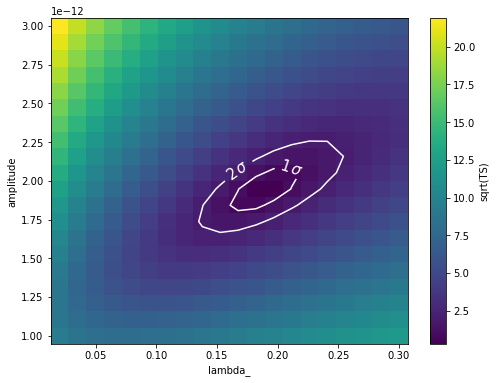

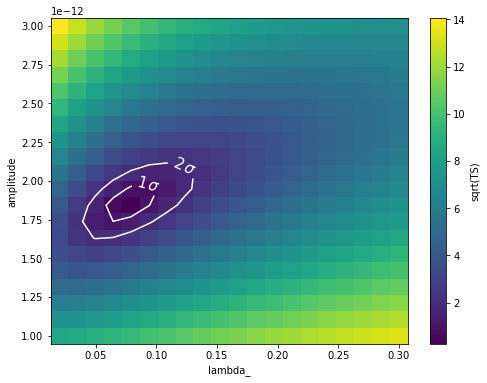

In [10]:
%%time

from gammapy.modeling import Fit
result_list = []

for idx, hess in enumerate(datasets_hess):
    hess.models = initial_model_hess.copy()
    hess = FoVBackgroundMaker().make_default_fov_background_model(dataset=hess)
    hess.models[-1].parameters['tilt'].frozen=False
    

    fit = Fit(store_trace=True)
    minuit_opts = {"tol": 0.001, "strategy": 1}
    fit.backend = "minuit"
    fit.optimize_opts = minuit_opts
    result_minuit = fit.run([hess])
    print(result_minuit)
    result_list.append(result_minuit)
    
    result = result_minuit
    par_alpha = result.parameters[8]
    par_beta = result.parameters[6]

    par_alpha.scan_values = np.linspace(0.02, 0.3, 20)
    par_beta.scan_values = np.linspace(1e-12, 3e-12, 20)
    
    fit = Fit(backend="minuit", optimize_opts={"print_level": 0})
    stat_surface = fit.stat_surface(
        datasets=[hess],
        x=par_alpha,
        y=par_beta,
        reoptimize=False,
    )
    
    TS = stat_surface["stat_scan"] - result.total_stat
    
    stat_surface = np.sqrt(TS.T)

    fig, ax = plt.subplots(figsize=(8, 6))
    x_values = par_alpha.scan_values
    y_values = par_beta.scan_values

    # plot surface
    im = ax.pcolormesh(x_values, y_values, stat_surface, shading="auto")
    fig.colorbar(im, label="sqrt(TS)")
    ax.set_xlabel(f"{par_alpha.name}")
    ax.set_ylabel(f"{par_beta.name}")

    # We choose to plot 1 and 2 sigma confidence contours
    levels = [1, 2]
    contours = ax.contour(
        x_values, y_values, stat_surface, levels=levels, colors="white"
    )
    ax.clabel(contours, fmt="%.0f$\,\sigma$", inline=3, fontsize=15);
    plt.show()